# Exploration of the Single MORDM Overijssel

This file follows the approach of the corresponding report. Within the exploration of the single MORDM Overijssel, 3 analyses will be conducted. This file has the following subchapters:
- initializing model
- Retrieve the policies & outcomes
- Analysis (1): Trade-off analysis
- Analysis (2): Open exploration
- Analysis (3): Best-case-worst-case selection

In [19]:
# Import general python packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

import seaborn as sns

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over,time_step_0,time_step_1

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, Scenario, Constraint, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring, prim, parcoords


## Model initializen

In [20]:

def initialize_model():
    ema_logging.log_to_stderr(ema_logging.INFO)
    print("Initializing model...")
    dike_model, planning_steps = get_model_for_problem_formulation(7)
    print("Model initialized.")
    return dike_model, planning_steps

# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor, uncertainties, levers):
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE

    model.uncertainties = uncertainties
    model.levers = levers

    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])

    if problem_formulation_actor == 6:  # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A1_', variable_name='A.1_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A2_', variable_name='A.2_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A3_', variable_name='A.3_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]


    elif problem_formulation_actor == 7:  # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A4_', variable_name='A.4_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A5_', variable_name='A.5_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]

    else:
        raise TypeError('unknown identifier')
    return model

### Overijssel
if __name__ == '__main__':
    dike_model, planning_steps = initialize_model()

    uncertainties = dike_model.uncertainties
    levers = dike_model.levers
    
    model = problem_formulation_actor(7, uncertainties, levers)

    # Deepcopying the uncertainties and levers
    uncertainties = copy.deepcopy(dike_model.uncertainties)
    levers = copy.deepcopy(dike_model.levers)

    # Running the optimization for Overijssel
    function = DikeNetwork()

Initializing model...
Model initialized.


## Retrieving the policies and outcomes 

In [21]:
#read a CSV file into a DataFrame
rf_policy_set= pd.read_csv('Overijssel_MORDM_Policies.csv')

In [25]:
policy_set = rf_policy_set.loc[~rf_policy_set.iloc[:, 1:51].duplicated()]
policies_o = policy_set.iloc[:,1:51]

## Analysis (1): Trade-off Analysis


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

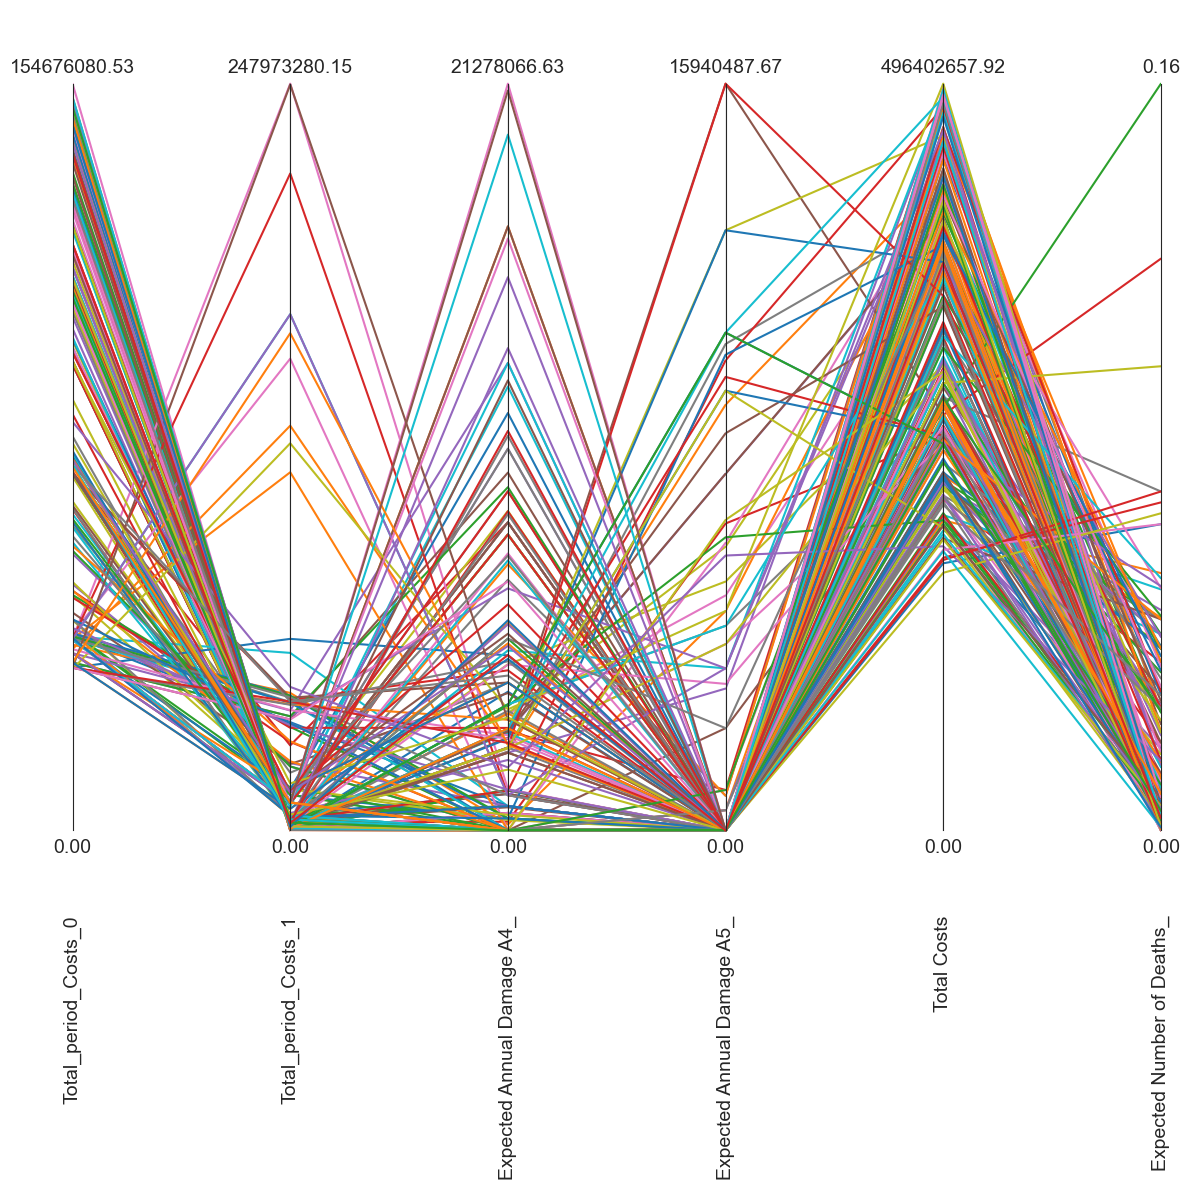

<Figure size 2400x1800 with 0 Axes>

In [37]:
# creating the variables
df_outcomes = policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(df_outcomes)
ref_limits.loc[0, df_outcomes.columns] = 0

paraxes = parcoords.ParallelAxes(ref_limits)

# Set the figure size to a larger dimension
plt.figure(figsize=(24, 18)) 

paraxes.plot(df_outcomes)
plt.show()

## Analysis (2): Open Exploration analysis 

In [14]:
experiments, outcomes = load_results('Exploration_Overijssel.tar.gz')

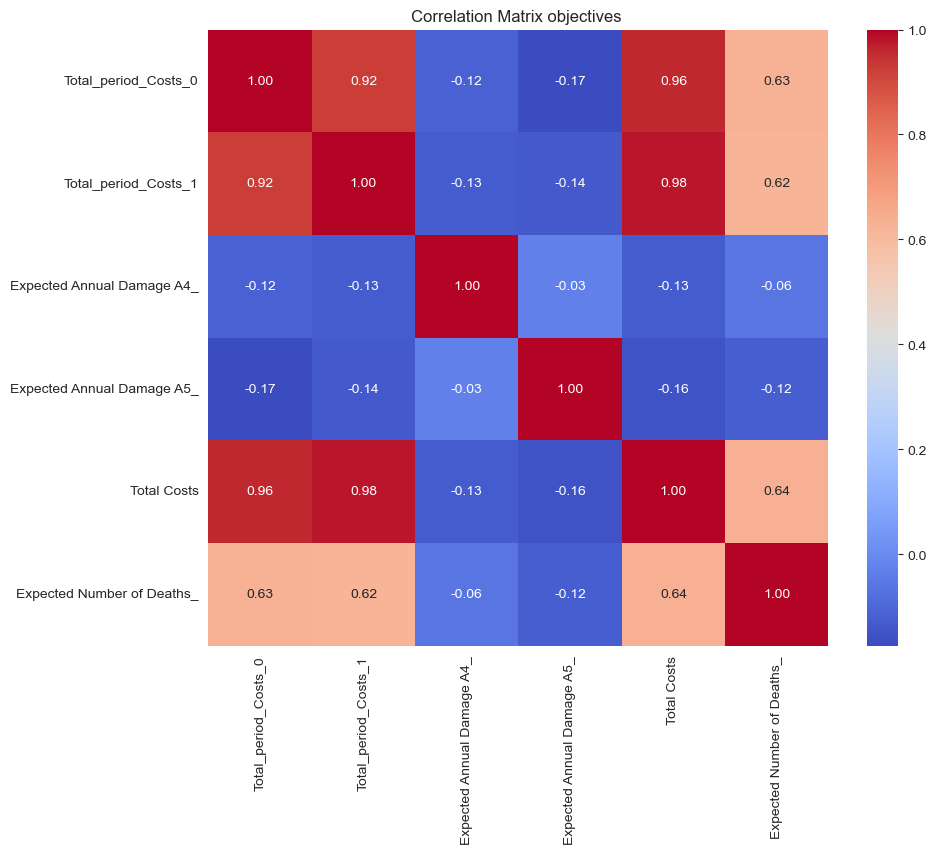

In [15]:
data = {}
for k,v in outcomes.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix objectives ')
plt.show()


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


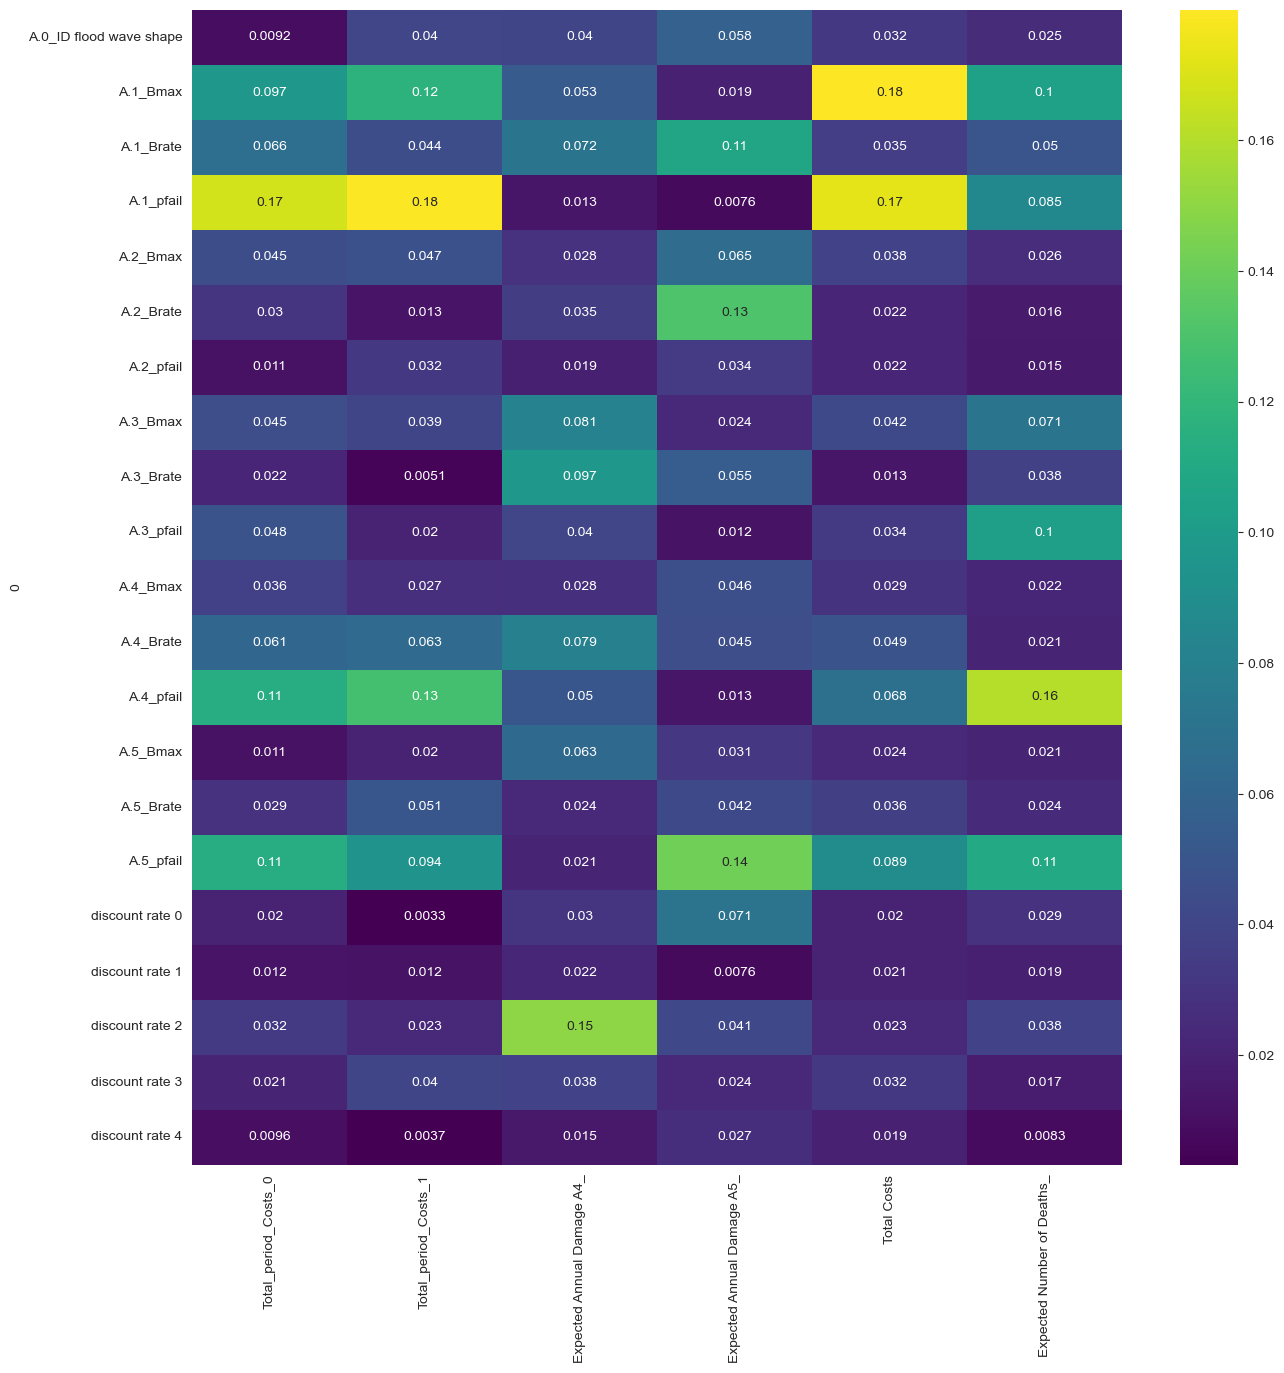

In [17]:
x = experiments.iloc[:,:21]
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

### PRIM

In [22]:

data = outcomes['Expected Annual Damage A4_']

y = data < np.percentile(data, 10)

# Initialize PRIM algorithm with the appropriate mode
prim_alg = prim.Prim(experiments, y, threshold=0.7)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

AssertionError: 

In [ ]:
box1.inspect(style='graph')
plt.show()

### Sobol

In [49]:
from SALib.analyze import sobol

In [50]:
for outcome in outcomes_pol_set:
    print(outcome)

Expected Annual Damage A4
Expected Annual Damage A5
Expected Number of Deaths in A4
Expected Number of Deaths in A5
Total Costs


In [51]:
xx = x.iloc[:,[1]]
xx

,A.1_Bmax
0,328.682725
1,271.151740
2,197.650243
3,267.976883
4,44.151139
...,...
11995,109.898647
11996,265.025510
11997,108.275372
11998,281.357288


In [52]:
yy = pd.DataFrame(y)

In [53]:
yy.size

60000

In [55]:
from SALib.sample import saltelli
problem = {
    'num_vars': len(x.columns),
    'names': list(x.columns),
    'bounds': [(min(x[col]), max(x[col])) for col in x],
    'dists': ['unif'] * len(x.columns)
}

param_values = saltelli.sample(problem, 2000, calc_second_order=True)

for _ in range(len(yy.columns)):
    print(yy.iloc[:,_])
    Si = sobol.analyze(problem, yy.iloc[:,_], print_to_console=True)

C:\Users\CLDert\AppData\Local\Temp\ipykernel_3300\593760227.py:9: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2000, calc_second_order=True)
C:\Users\CLDert\AppData\Roaming\Python\Python311\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (2000) is equal to `2^n`.
        
  warnings.warn(msg)


ValueError: Uniform distribution: lower bound
                    must be less than upper bound

In [56]:
import pandas as pd
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol

# Assuming 'x' is your DataFrame with 1000 samples for 71 input variables
# And 'yy' is your DataFrame with 1000 samples for 10 outcomes

# Step 1: Define the problem dictionary
problem = {
    'num_vars': len(xx.columns),  # Number of input variables
    'names': list(xx.columns),  # Names of the input variables
    'bounds': [(min(xx[col]), max(xx[col])) for col in xx],  # Bounds for each input variable
    'dists': ['unif'] * len(xx.columns)  # Assuming uniform distribution for each variable
}

param_values = saltelli.sample(problem, 2000, calc_second_order=True)
# Step 3: Run Sobol analysis for each outcome
results = {}
for outcome in yy.columns:
    # Assuming the order of rows in `yy` corresponds to the order of rows in `x`
    Y = yy[outcome].values  # Extract outcome values as array
    
    # Check the sample size consistency
    if len(Y) != param_values.shape[0] // (len(problem['names']) + 2):
        raise ValueError("Number of samples in outcomes does not match the required number of samples for Sobol analysis")

    else: # Perform Sobol sensitivity analysis
        Si = sobol.analyze(problem, Y, print_to_console=True)
        
        results[outcome] = Si

sobol_indices = {}
for outcome, Si in results.items():
    sobol_indices[outcome] = {
        'S1': Si['S1'],
        'ST': Si['ST'],
        'S2': Si['S2']
    }

sobol_df = pd.DataFrame(sobol_indices)
print(sobol_df)


C:\Users\CLDert\AppData\Local\Temp\ipykernel_3300\1235373904.py:17: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2000, calc_second_order=True)
C:\Users\CLDert\AppData\Roaming\Python\Python311\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (2000) is equal to `2^n`.
        
  warnings.warn(msg)


ValueError: Number of samples in outcomes does not match the required number of samples for Sobol analysis

# Selecting the scenarios based on assignment 10


In [57]:
## Best case, Worst case

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

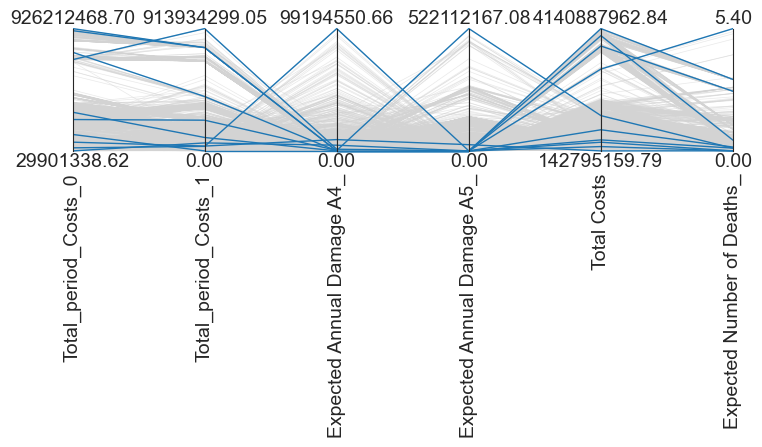

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import parcoords

# conditional on y
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# let's get the unique indices for the minima and maxima across 
# all objectives
indices = pd.concat([all_data.idxmax(), all_data.idxmin()]).unique()

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)


axes.plot(all_data, color='lightgrey', lw=0.5, alpha=0.5)
axes.plot(all_data.iloc[indices, :], color=sns.color_palette()[0], lw=1)

fig = plt.gcf()
fig.set_size_inches((8, 4))

plt.show()

In [24]:
print(all_data.idxmax())

Total_period_Costs_0          1361
Total_period_Costs_1          1851
Expected Annual Damage A4_    1266
Expected Annual Damage A5_    1035
Total Costs                    201
Expected Number of Deaths_     900
dtype: int64


In [25]:
print(all_data.idxmin())

Total_period_Costs_0          1102
Total_period_Costs_1             2
Expected Annual Damage A4_       0
Expected Annual Damage A5_       0
Total Costs                   2042
Expected Number of Deaths_       2
dtype: int64


In [65]:
# also all we need are the uncertainty columns
selected = experiments_pol_set.loc[[1, 0, 6310, 6891, 3589, 1095, 1225, 1760], ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1','discount rate 2']]
selected

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
1,18,271.151740,10.0,0.041304,43.558330,10.0,0.133565,202.056870,1.0,0.096704,322.885644,1.5,0.522520,150.485413,1.0,0.554581,2.5,4.5,4.5
0,114,328.682725,1.5,0.713485,139.532438,1.0,0.515097,228.360825,10.0,0.865021,313.769757,1.5,0.854691,197.746061,1.5,0.001669,3.5,2.5,4.5
6310,49,152.273491,1.5,0.638841,277.500825,10.0,0.733632,203.597102,1.5,0.901363,59.184599,1.5,0.911019,168.499463,1.0,0.967137,3.5,1.5,4.5
6891,34,310.237908,1.5,0.947393,347.727055,1.5,0.928448,70.689488,1.5,0.508559,174.511581,1.0,0.032153,164.888799,1.5,0.763368,2.5,2.5,1.5
3589,23,293.318444,1.5,0.835983,156.444499,10.0,0.941283,213.467381,10.0,0.227340,215.231289,10.0,0.372650,177.400554,1.5,0.010856,1.5,1.5,1.5
1095,123,336.318160,1.0,0.587482,95.498825,1.5,0.754829,143.375075,10.0,0.770438,147.994590,1.0,0.012642,46.070806,10.0,0.375614,4.5,2.5,2.5
1225,123,102.434202,1.5,0.818158,279.800908,1.5,0.653798,192.157539,1.5,0.712300,85.432584,1.5,0.878431,335.877382,1.0,0.000151,1.5,3.5,3.5
1760,75,140.049123,1.5,0.096766,290.591927,10.0,0.741998,272.514894,10.0,0.018127,286.398589,10.0,0.722989,244.666154,1.0,0.344650,2.5,1.5,1.5


In [66]:
# for multi scenario MORDM: take scenario 2 (GOOD + more reasonable/realistic scenarios when looking at p_fails(very low for 1) + we care more about lives than money(within the constraints)), reference scenario and scenarios 1225,  6891 (BAD + deaths in A5 (Deventer city), damages to farm lands of A4 and again we care less about costs)